In [2]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [3]:
data = yf.download("SPSC", start="2024-01-18",
                    end="2024-03-30", group_by='tickers')

[*********************100%***********************]  1 of 1 completed


In [4]:
data['VOLXCLOSE'] = data['Close'] * data['Volume']

In [5]:
## figure out a way to import Beta Values of the holdings in the fund

In [6]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,VOLXCLOSE
Date,,,,,,,
2024-01-18,182.940002,183.520004,180.119995,182.330002,182.330002,109000,1.987397e+07
2024-01-19,183.679993,185.149994,181.320007,184.929993,184.929993,123500,2.283885e+07
2024-01-22,186.990005,190.279999,186.399994,188.460007,188.460007,154700,2.915476e+07
2024-01-23,190.259995,191.419998,187.350006,189.550003,189.550003,99500,1.886023e+07
2024-01-24,191.789993,192.449997,186.759995,187.369995,187.369995,78000,1.461486e+07


In [7]:
data['VWAP'] = (data['VOLXCLOSE'].rolling(7).sum())  / (data['Volume'].rolling(7).sum())

In [8]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,VOLXCLOSE,VWAP
Date,,,,,,,,
2024-01-18,182.940002,183.520004,180.119995,182.330002,182.330002,109000,1.987397e+07,NaN
2024-01-19,183.679993,185.149994,181.320007,184.929993,184.929993,123500,2.283885e+07,NaN
2024-01-22,186.990005,190.279999,186.399994,188.460007,188.460007,154700,2.915476e+07,NaN
2024-01-23,190.259995,191.419998,187.350006,189.550003,189.550003,99500,1.886023e+07,NaN
2024-01-24,191.789993,192.449997,186.759995,187.369995,187.369995,78000,1.461486e+07,NaN


In [9]:
def analyze(Ticker,Date):
    data = yf.download(Ticker, start=Date,
                    end="2024-05-30", group_by='tickers')
    data['VOLXCLOSE'] = data['Close'] * data['Volume']
    data['VWAP'] =(data['VOLXCLOSE'].rolling(7).sum())  / (data['Volume'].rolling(7).sum())
    return data

In [10]:
df = analyze("SPSC", "2024-04-18")
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,VOLXCLOSE,VWAP
Date,,,,,,,,
2024-04-18,161.990005,165.259995,160.580002,163.130005,163.130005,243500,3.972216e+07,NaN
2024-04-19,162.589996,166.369995,162.539993,165.490005,165.490005,251300,4.158764e+07,NaN
2024-04-22,166.149994,171.360001,165.690002,168.639999,168.639999,223800,3.774163e+07,NaN
2024-04-23,168.789993,173.589996,168.789993,170.600006,170.600006,207800,3.545068e+07,NaN
2024-04-24,169.570007,173.759995,169.570007,171.119995,171.119995,193900,3.318017e+07,NaN


In [11]:
data['AmiRatio'] = ((data['Close'] - data['Open']) / data['Open'] ) / data['VOLXCLOSE']
data.head(15)

,Open,High,Low,Close,Adj Close,Volume,VOLXCLOSE,VWAP,AmiRatio
Date,,,,,,,,,
2024-01-18,182.940002,183.520004,180.119995,182.330002,182.330002,109000,1.987397e+07,NaN,-1.677788e-10
2024-01-19,183.679993,185.149994,181.320007,184.929993,184.929993,123500,2.283885e+07,NaN,2.979709e-10
2024-01-22,186.990005,190.279999,186.399994,188.460007,188.460007,154700,2.915476e+07,NaN,2.696434e-10
2024-01-23,190.259995,191.419998,187.350006,189.550003,189.550003,99500,1.886023e+07,NaN,-1.978603e-10
2024-01-24,191.789993,192.449997,186.759995,187.369995,187.369995,78000,1.461486e+07,NaN,-1.576890e-09
2024-01-25,189.970001,189.970001,184.380005,185.580002,185.580002,95600,1.774145e+07,NaN,-1.302538e-09
2024-01-26,186.899994,187.479996,185.449997,186.600006,186.600006,111600,2.082456e+07,186.434358,-7.707587e-11
2024-01-29,186.669998,191.740005,186.669998,191.130005,191.130005,101200,1.934236e+07,187.641758,1.235241e-09
2024-01-30,190.259995,192.250000,188.169998,190.210007,190.210007,135900,2.584954e+07,188.522541,-1.016398e-11


In [12]:
data = data.reset_index()


In [13]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,VOLXCLOSE,VWAP,AmiRatio
0,2024-01-18,182.940002,183.520004,180.119995,182.330002,182.330002,109000,1.987397e+07,NaN,-1.677788e-10
1,2024-01-19,183.679993,185.149994,181.320007,184.929993,184.929993,123500,2.283885e+07,NaN,2.979709e-10
2,2024-01-22,186.990005,190.279999,186.399994,188.460007,188.460007,154700,2.915476e+07,NaN,2.696434e-10
3,2024-01-23,190.259995,191.419998,187.350006,189.550003,189.550003,99500,1.886023e+07,NaN,-1.978603e-10
4,2024-01-24,191.789993,192.449997,186.759995,187.369995,187.369995,78000,1.461486e+07,NaN,-1.576890e-09
5,2024-01-25,189.970001,189.970001,184.380005,185.580002,185.580002,95600,1.774145e+07,NaN,-1.302538e-09
6,2024-01-26,186.899994,187.479996,185.449997,186.600006,186.600006,111600,2.082456e+07,186.434358,-7.707587e-11
7,2024-01-29,186.669998,191.740005,186.669998,191.130005,191.130005,101200,1.934236e+07,187.641758,1.235241e-09
8,2024-01-30,190.259995,192.250000,188.169998,190.210007,190.210007,135900,2.584954e+07,188.522541,-1.016398e-11
9,2024-01-31,190.020004,190.020004,183.279999,183.800003,183.800003,186500,3.427870e+07,187.444873,-9.549196e-10


In [14]:
data['Weekday'] = data['Date'].dt.day_name()
day_ratio_df = data[['Weekday', 'AmiRatio']]
day_ratio_df.head(10)

,Weekday,AmiRatio
0,Thursday,-1.677788e-10
1,Friday,2.979709e-10
2,Monday,2.696434e-10
3,Tuesday,-1.978603e-10
4,Wednesday,-1.576890e-09
5,Thursday,-1.302538e-09
6,Friday,-7.707587e-11
7,Monday,1.235241e-09
8,Tuesday,-1.016398e-11
9,Wednesday,-9.549196e-10


# Experimental, Box and Whisker plot

In [15]:
day_ratio_df.groupby('Weekday').mean()

,AmiRatio
Weekday,
Friday,-1.011093e-11
Monday,7.724976e-11
Thursday,-2.145806e-10
Tuesday,-2.446083e-10
Wednesday,-1.380430e-10


In [16]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

C:\Users\micha\AppData\Local\Temp\ipykernel_32992\565863751.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weekday', y='AmiRatio', data=day_ratio_df, palette='coolwarm', order = weekday_order)


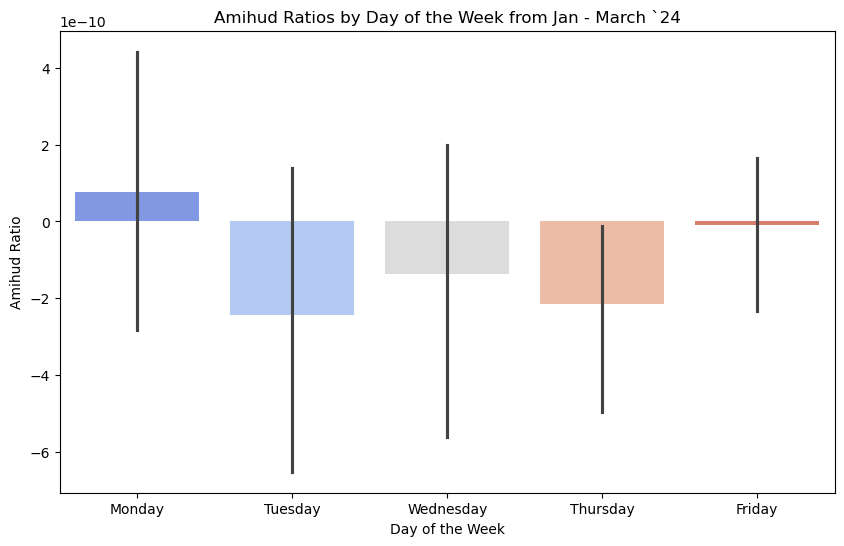

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Weekday', y='AmiRatio', data=day_ratio_df, palette='coolwarm', order = weekday_order)

# Add title and labels
plt.title('Amihud Ratios by Day of the Week from Jan - March `24')
plt.xlabel('Day of the Week')
plt.ylabel('Amihud Ratio')

# Display the plot
plt.show()

# Averages of Amihud Ratios moves in a 'U' Shape trajectory

# Soundwave Chart


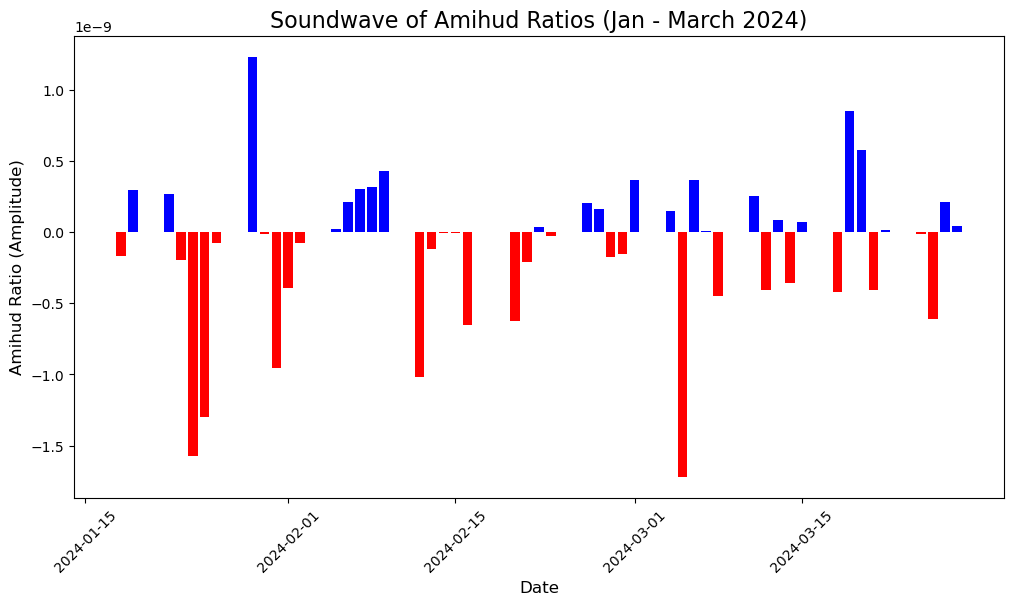

In [18]:
plt.figure(figsize=(12, 6))
plt.bar(data['Date'], data['AmiRatio'], color=['blue' if val >= 0 else 'red' for val in data['AmiRatio']], width=0.8)

# Add title and labels
plt.title('Soundwave of Amihud Ratios (Jan - March 2024)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Amihud Ratio (Amplitude)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [19]:
fig = px.bar(data, x='Date', y='AmiRatio',
             color='AmiRatio',  # Color bars based on value
             labels={'AmiRatio': 'Amihud Ratio (Amplitude)', 'Date': 'Transaction Date'},
             title='Interactive Soundwave of Amihud Ratios Over January - March 2024 for SPSC',
             hover_data={'Date': True, 'AmiRatio': True})  # Show data on hover

# Customize the colors and appearance
fig.update_traces(marker=dict(color=data['AmiRatio'].apply(lambda x: 'blue' if x >= 0 else 'red')))

# Show the interactive plot
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# Higher Compensation of Liquidity Premiums on:

*   January 29th
*   Feb 5th - 9th



# Look into the following Dates:
*   Jan 24th, 25th
*   Jan 31st
*   Feb 12th, 16th, 20th
*   March 5th

# Positive Side (Look into what securities we traded and other market sentiment)

*   Jan 29th
*   Mar 19th, 20th









In [ ]:
# transactions = pd.read_excel('Transactions.xlsx')

In [ ]:
transactions['Ticker2'] = transactions['Ticker'].str.split(':', expand=True)[1]

In [ ]:
transactions.dropna(subset='Price',inplace=True)

In [ ]:
len(transactions)

35

# Incorporate Beta Values for each security (B0)

In [ ]:
transactions

,Date,Industry,Sector,Security Name,Client Symbol,Ticker,CUSIP,Trading Currency,Price,Shares,Type,Ticker2
0,2024-04-05,Speciality Retail,Consumer Cyclical,"Williams-Sonoma, Inc.",969904101,NYSE:WSM,NaN,USD,309.41,1469.0,Sell,WSM
1,2024-04-26,Speciality Retail,Consumer Cyclical,"Five Below, Inc.",33829M101,NasdaqGS:FIVE,NaN,USD,64.06,1298.0,Buy,FIVE
2,2024-04-26,Recreational Vehicles,Consumer Cyclical,Polaris Inc.,731068102,NYSE:PII,NaN,USD,88.20,3740.0,Sell,PII
3,2024-04-26,Leisure,Consumer Cyclical,"YETI Holdings, Inc.",98585X104,NYSE:YETI,NaN,USD,36.15,5441.0,Buy,YETI
4,2024-04-26,Banks/Regional,Financial Services,"Stock Yards Bancorp, Inc.",861025104,NasdaqGS:SYBT,NaN,USD,46.18,5820.0,Sell,SYBT
5,2024-04-26,Banks/Regional,Financial Services,"The Bancorp, Inc.",05969A105,NasdaqGS:TBBK,NaN,USD,30.80,9690.0,Buy,TBBK
78,2024-02-23,Medical Care Facilities,Healthcare,Addus HomeCare Corporation,6739106,NasdaqGS:ADUS,NaN,USD,89.10,714.0,Buy,ADUS
79,2024-02-23,Bio Technology,Healthcare,Bio-Techne Corporation,09073M104,NasdaqGS:TECH,NaN,USD,71.62,443.0,Buy,TECH
80,2024-02-23,Drug Manufacturers,Healthcare,"Neurocrine Biosciences, Inc.",64125C109,NasdaqGS:NBIX,NaN,USD,134.18,244.0,Buy,NBIX
97,2024-02-23,Medical Devices,Healthcare,"Tactile Systems Technology, Inc.",87357P100,NasdaqGM:TCMD,NaN,USD,15.84,9408.0,Sell,TCMD


### Testing out using Schwab to get SPSC Bid-Ask

In [1]:
import urllib.parse
import schwabdev 
import requests
import os
import time
import pandas as pd

In [2]:
from dotenv import load_dotenv

In [4]:
load_dotenv()

True

In [5]:
app_key = os.getenv('APP_KEY')
secret = os.getenv('SECRET_KEY')

In [6]:
client = schwabdev.Client(app_key=app_key, app_secret=secret)

# now you can make any calls you want

#print(client.quote("AMD").ok())
print(client.quote("SPSC", ).json()) # wanna make sure the request went through ok first

[Errno 2] No such file or directory: 'tokens.json'
Open to authenticate: https://api.schwabapi.com/v1/oauth/authorize?client_id=YY2iYyAGA115uR76cTmaWQM6598OSDk6&redirect_uri=https://127.0.0.1
{'SPSC': {'assetMainType': 'EQUITY', 'assetSubType': 'COE', 'quoteType': 'NBBO', 'realtime': True, 'ssid': 1590943304, 'symbol': 'SPSC', 'fundamental': {'avg10DaysVolume': 150875.0, 'avg1YearVolume': 173466.0, 'divAmount': 0.0, 'divFreq': 0, 'divPayAmount': 0.0, 'divYield': 0.0, 'eps': 1.76, 'fundLeverageFactor': 0.0, 'lastEarningsDate': '2024-07-25T04:00:00Z', 'peRatio': 99.5014}, 'quote': {'52WeekHigh': 218.74, '52WeekLow': 151.96, 'askMICId': 'BATS', 'askPrice': 181.0, 'askSize': 3, 'askTime': 1729891825496, 'bidMICId': 'XNAS', 'bidPrice': 69.18, 'bidSize': 1, 'bidTime': 1729899193059, 'closePrice': 190.98, 'highPrice': 190.9, 'lastMICId': 'XNAS', 'lastPrice': 173.49, 'lastSize': 5, 'lowPrice': 169.18, 'mark': 170.49, 'markChange': -20.49, 'markPercentChange': -10.72887213, 'netChange': -17.49,

In [7]:
print(client.quote('SPSC').json()['SPSC']['quote']['askPrice']
    )
print(client.quote('SPSC').json()['SPSC']['quote']['bidPrice']
    )

181.0
69.18
